In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models, Sequential, layers, optimizers
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

import os
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.utils import np_utils

print(tf.__version__)
print(keras.__version__)



2.2.0-rc4
2.3.0-tf


Using TensorFlow backend.


In [0]:
tf.random.set_seed(13)

# Datasets shapes

In [0]:
chosen_dataset = "cifar"
if chosen_dataset is "mnist":
  dataset_shape = (28,28,1)
  number_classes = 10
elif chosen_dataset is "cifar":
  dataset_shape = (32,32,3)
  number_classes = 10

# GoogLeNet architecture

In [0]:
#Inception model
def inception_module(x,f):
    t1 = tf.keras.layers.Conv2D(f[0], 1, activation='relu')(x)
    
    t2 = tf.keras.layers.Conv2D(f[1], 1, activation='relu')(x)
    t2 = tf.keras.layers.Conv2D(f[2], 3, padding='same', activation='relu')(t2)
    
    t3 = tf.keras.layers.Conv2D(f[3], 1, activation='relu')(x)
    t3 = tf.keras.layers.Conv2D(f[4], 5, padding='same', activation='relu')(t3)
    
    t4 = tf.keras.layers.MaxPool2D(3, 1, padding='same')(x)
    t4 = tf.keras.layers.Conv2D(f[5], 1, activation='relu')(t4)
    
    output = tf.keras.layers.Concatenate()([t1, t2, t3, t4])
    return output

In [40]:
input = tf.keras.Input(dataset_shape)

google_net = tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(input)
google_net = tf.keras.layers.MaxPool2D(3, strides=2, padding='same')(google_net)
  
google_net = tf.keras.layers.Conv2D(64, 1, activation='relu')(google_net)
google_net = tf.keras.layers.Conv2D(192, 3, padding='same', activation='relu')(google_net)
google_net = tf.keras.layers.MaxPool2D(3, strides=2)(google_net)
 
google_net = inception_module(google_net, [64, 96, 128, 16, 32, 32])
google_net = inception_module(google_net, [128, 128, 192, 32, 96, 64])
google_net = tf.keras.layers.MaxPool2D(3, strides=2, padding='same')(google_net)
 
google_net = inception_module(google_net, [192, 96, 208, 16, 48, 64])
google_net = inception_module(google_net, [160, 112, 224, 24, 64, 64])
google_net = inception_module(google_net, [128, 128, 256, 24, 64, 64])
google_net = inception_module(google_net, [112, 144, 288, 32, 64, 64])
google_net = inception_module(google_net, [256, 160, 320, 32, 128, 128])
google_net = tf.keras.layers.MaxPool2D(3, strides=2, padding='same')(google_net)

google_net = inception_module(google_net, [256, 160, 320, 32, 128, 128])
google_net = inception_module(google_net, [384, 192, 384, 48, 128, 128])

google_net = tf.keras.layers.AveragePooling2D(7, strides=(7,7),padding='same')(google_net)
google_net = tf.keras.layers.Dropout(0.4)(google_net)
  
google_net = tf.keras.layers.Flatten()(google_net)
output = tf.keras.layers.Dense(number_classes, activation='softmax')(google_net)

model = tf.keras.Model(input, output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 8, 8, 64)     0           conv2d_57[0][0]                  
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 8, 8, 64)     4160        max_pooling2d_13[0][0]           
____________________________________________________________________________________________

# MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist #load mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data() # by using this command you load the data
x_train, x_test = x_train / 255.0, x_test / 255.0 # change every value from 0 - 255 to 0 - 1, you don't modify labels because they are from 0 -9 (digits) 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
regular_x_train = x_train
regular_x_test = x_test


In [8]:
print(x_train.shape)

(60000, 28, 28)


Train Set Size = 60000 images
Test Set Size = 10000 images


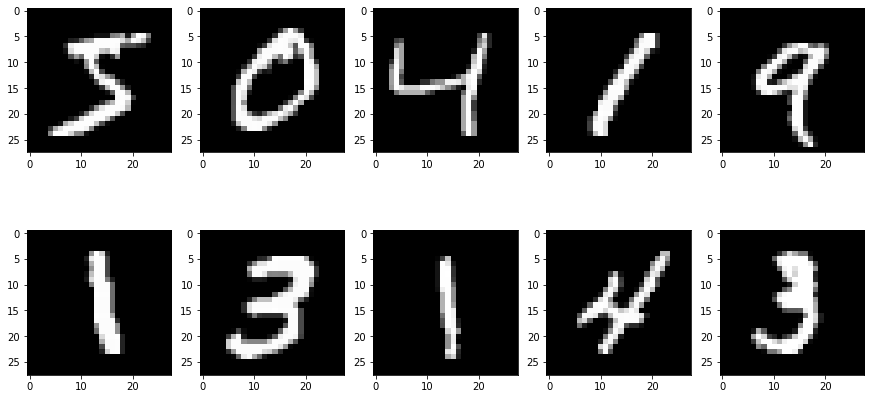

Labels : [5 0 4 1 9]
Labels : [1 3 1 4 3]


In [9]:
print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))


In [0]:
# single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

y_train_onehot = keras.utils.to_categorical(y_train, number_classes)
y_test_onehot = keras.utils.to_categorical(y_test, number_classes)

In [0]:
# model.compile(
#       loss=tf.keras.losses.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy',),
#       optimizer='adam',
#       metrics=['accuracy']
# )


model.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
   optimizer=tf.keras.optimizers.RMSprop(1e-4),
   metrics=['accuracy']
)

In [12]:
EPOCHS = 50

results = model.fit(
    x_train,y_train_onehot,batch_size=128,epochs=EPOCHS,validation_data=(x_test,y_test_onehot),
    verbose=1,shuffle=True)


Epoch 1/50
469/469 [==============================] - 60s 128ms/step - loss: 1.2622 - accuracy: 0.5345 - val_loss: 0.4863 - val_accuracy: 0.8447
Epoch 2/50
469/469 [==============================] - 57s 121ms/step - loss: 0.3976 - accuracy: 0.8723 - val_loss: 0.1438 - val_accuracy: 0.9589
Epoch 3/50
469/469 [==============================] - 57s 121ms/step - loss: 0.1630 - accuracy: 0.9536 - val_loss: 0.0887 - val_accuracy: 0.9735
Epoch 4/50
469/469 [==============================] - 57s 121ms/step - loss: 0.0988 - accuracy: 0.9718 - val_loss: 0.0525 - val_accuracy: 0.9850
Epoch 5/50
469/469 [==============================] - 57s 121ms/step - loss: 0.0720 - accuracy: 0.9800 - val_loss: 0.0540 - val_accuracy: 0.9844
Epoch 6/50
469/469 [==============================] - 57s 121ms/step - loss: 0.0571 - accuracy: 0.9848 - val_loss: 0.1345 - val_accuracy: 0.9662
Epoch 7/50
469/469 [==============================] - 57s 121ms/step - loss: 0.0459 - accuracy: 0.9873 - val_loss: 0.1959 - val_ac

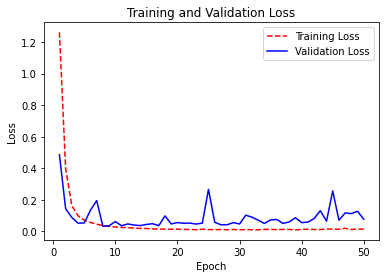

In [13]:
# Get training and test loss histories
training_loss = results.history['loss']
test_loss = results.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training and Validation Loss")
plt.show();

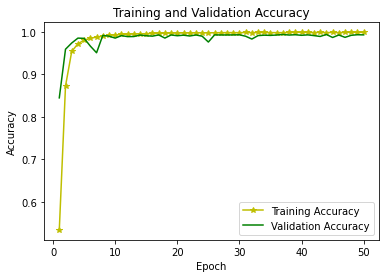

In [14]:
# Get training and test accuracy histories
training_acc = results.history['accuracy']
test_acc = results.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize history
plt.plot(epoch_count, training_acc, 'y-*')
plt.plot(epoch_count, test_acc, 'g-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy")
plt.show();

In [0]:
predictions = model.predict(x_test, verbose=0)

In [37]:
first_row = []
second_row = []
for i in range(10,20,1):
    index  = str(np.where(predictions[i] == 1))
    first_row.append(index[8])

print("True labels")
print(y_test[10:20])

print("Classified as:")
print(first_row)


True labels
[0 6 9 0 1 5 9 7 3 4]
Classified as:
['0', '6', '9', '0', '1', '5', '9', '7', '3', '4']


# CIFAR10 dataset

In [41]:
(cifar_train_x, cifar_train_y),(cifar_test_x, cifar_test_y) = keras.datasets.cifar10.load_data()

#Normalize
cifar_train_x ,cifar_test_x = cifar_train_x / 255.0, cifar_test_x / 255.0

print("Cifar train images: ",cifar_train_x.shape)
print("Cifar train labels: ",cifar_train_y.shape)
print("Cifar test images: ",cifar_test_x.shape)
print("Cifar test labels: ",cifar_test_y.shape)


170500096/170498071 [==============================] - 2s 0us/step
Cifar train images:  (50000, 32, 32, 3)
Cifar train labels:  (50000, 1)
Cifar test images:  (10000, 32, 32, 3)
Cifar test labels:  (10000, 1)


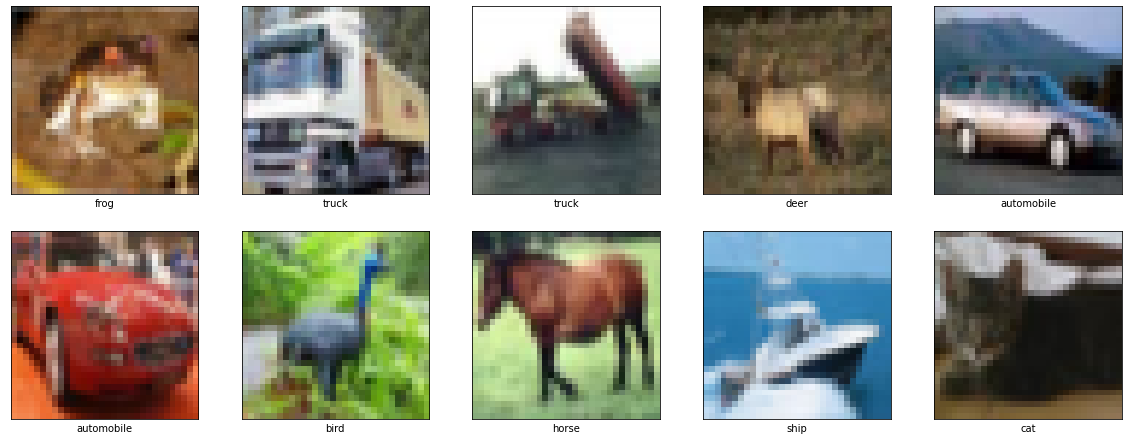

In [42]:
class_names = ['airplane','automobile', 'bird', 'cat','deer',
               'dog','frog','horse','ship','truck']


plt.figure(figsize = (20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cifar_train_x[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[cifar_train_y[i][0]])
plt.show()

In [0]:
model.compile(
   loss=tf.keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
   optimizer=tf.keras.optimizers.RMSprop(5e-4),
   metrics=['accuracy']
) 

In [0]:
cifar_train_y_onehot = keras.utils.to_categorical(cifar_train_y, number_classes)
cifar_test_y_onehot = keras.utils.to_categorical(cifar_test_y, number_classes)

In [45]:
EPOCHS = 50

cifar_results = model.fit(
    cifar_train_x,cifar_train_y_onehot,batch_size=128,epochs=EPOCHS,validation_data=(cifar_test_x,cifar_test_y_onehot),
    verbose=1,shuffle=True)

Epoch 1/50
391/391 [==============================] - 53s 134ms/step - loss: 2.1806 - accuracy: 0.1551 - val_loss: 1.9653 - val_accuracy: 0.1999
Epoch 2/50
391/391 [==============================] - 51s 131ms/step - loss: 1.8650 - accuracy: 0.2743 - val_loss: 1.9825 - val_accuracy: 0.2562
Epoch 3/50
391/391 [==============================] - 51s 130ms/step - loss: 1.6403 - accuracy: 0.3682 - val_loss: 1.4788 - val_accuracy: 0.4429
Epoch 4/50
391/391 [==============================] - 49s 124ms/step - loss: 1.4668 - accuracy: 0.4615 - val_loss: 1.6275 - val_accuracy: 0.4120
Epoch 5/50
391/391 [==============================] - 48s 123ms/step - loss: 1.3252 - accuracy: 0.5234 - val_loss: 1.2440 - val_accuracy: 0.5504
Epoch 6/50
391/391 [==============================] - 48s 123ms/step - loss: 1.2144 - accuracy: 0.5705 - val_loss: 1.3148 - val_accuracy: 0.5412
Epoch 7/50
391/391 [==============================] - 48s 123ms/step - loss: 1.1197 - accuracy: 0.6086 - val_loss: 1.2355 - val_ac

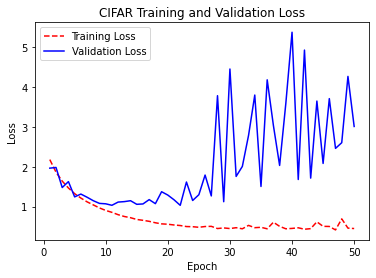

In [46]:
# Get training and test loss histories
cifar_training_loss = cifar_results.history['loss']
cifar_test_loss = cifar_results.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(cifar_training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, cifar_training_loss, 'r--')
plt.plot(epoch_count, cifar_test_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("CIFAR Training and Validation Loss")
plt.show();

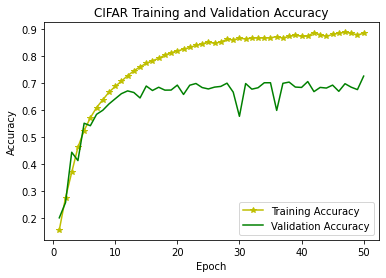

In [47]:
# Get training and test accuracy histories
cifar_training_accuracy = cifar_results.history['accuracy']
cifar_test_accuracy = cifar_results.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(cifar_training_accuracy) + 1)

# Visualize history
plt.plot(epoch_count, cifar_training_accuracy, 'y-*')
plt.plot(epoch_count, cifar_test_accuracy, 'g-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("CIFAR Training and Validation Accuracy")
plt.show();

In [0]:
predictions = model.predict(cifar_test_x, verbose=0)

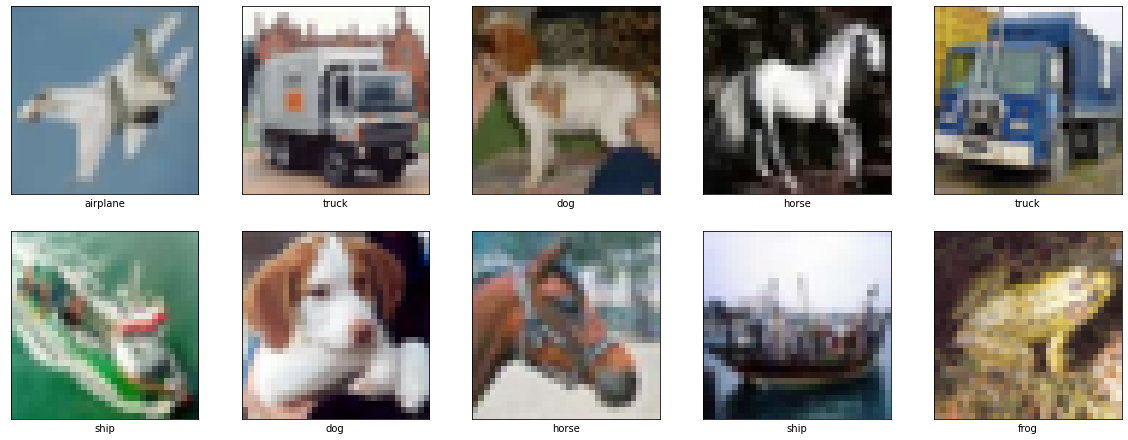

True labels:
['[0]', '[9]', '[5]', '[7]', '[9]', '[8]', '[5]', '[7]', '[8]', '[6]']
Classified as:
[0, 9, 6, 7, 9, 8, 5, 7, 8, 6]


In [53]:
class_names = ['airplane','automobile', 'bird', 'cat','deer',
               'dog','frog','horse','ship','truck']


plt.figure(figsize = (20,20))
for i in range(10,20,1):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cifar_test_x[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[cifar_test_y[i][0]])
plt.show()


predictions_array = []
true_labels = []
for i in cifar_test_y[10:20]:
  index = str(i)
  true_labels.append(index)
for i in predictions[10:20]:
  predictions_array.append(np.argmax(i))


print("True labels:")
print(true_labels)
print("Classified as:")
print(predictions_array)